<a href="https://colab.research.google.com/github/jumbokh/python_learn/blob/master/notebooks/cvColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 照片人臉偵測
### 使用 OpenCV 與 Dlib 開發人臉偵測程式: shorturl.at/guwNR
### OpenCV 擷取網路攝影機影像: shorturl.at/oIT19

In [1]:
import dlib
import cv2
import imutils

In [2]:
# 讀取照片圖檔
img = cv2.imread('image.jpg')

# 縮小圖片
img = imutils.resize(img, width=1280)

In [3]:
# Dlib 的人臉偵測器
detector = dlib.get_frontal_face_detector()

# 偵測人臉
face_rects = detector(img, 0)

In [5]:
# 取出所有偵測的結果
for i, d in enumerate(face_rects):
  x1 = d.left()
  y1 = d.top()
  x2 = d.right()
  y2 = d.bottom()
   # 以方框標示偵測的人臉
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

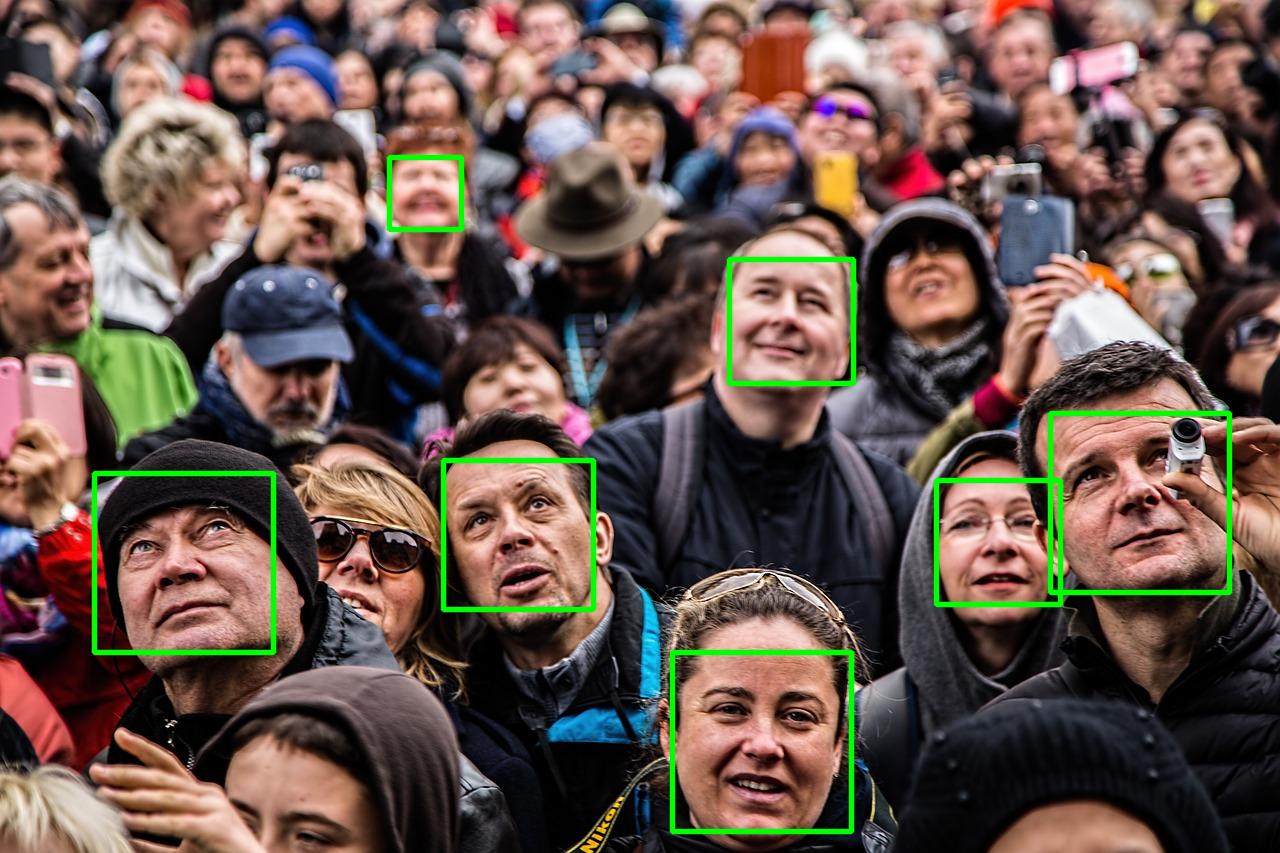

In [7]:
# 顯示結果
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [8]:
import dlib
import cv2
import imutils

img = cv2.imread('human-740259_1280.jpg')
img = imutils.resize(img, width=1280)
detector = dlib.get_frontal_face_detector()

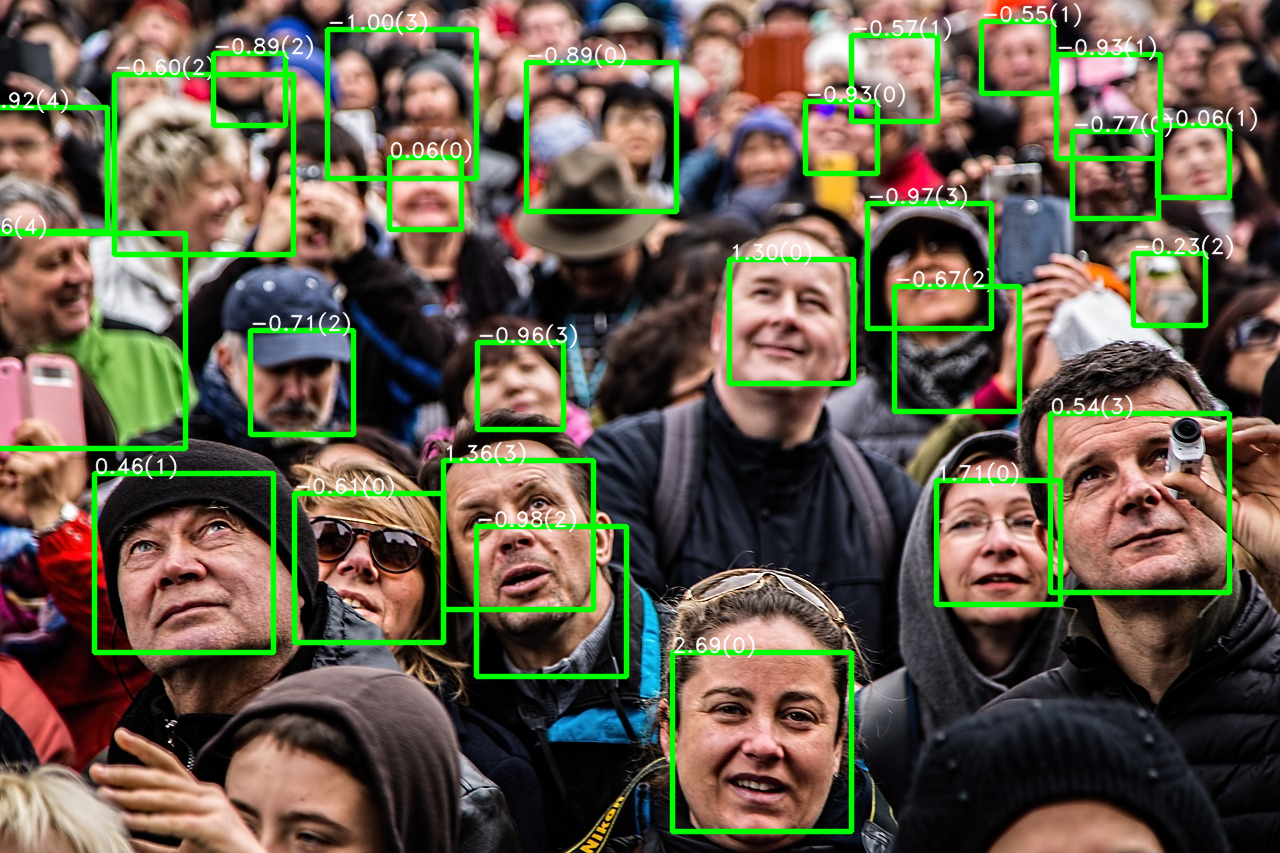

In [9]:
# 偵測人臉，輸出分數
face_rects, scores, idx = detector.run(img, 0, -1)

for i, d in enumerate(face_rects):
  x1 = d.left()
  y1 = d.top()
  x2 = d.right()
  y2 = d.bottom()
  text = "%2.2f(%d)" % (scores[i], idx[i])

  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

  # 標示分數
  cv2.putText(img, text, (x1, y1), cv2.FONT_HERSHEY_DUPLEX,
          0.7, (255, 255, 255), 1, cv2.LINE_AA)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>